# Linear Regression và Polynomial Regression

- Nguyễn Hữu Vũ  
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Tạo dữ liệu x, y để test
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
x = np.array(sorted(x)) #sort để vẽ đồ thị dễ dàng hơn
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

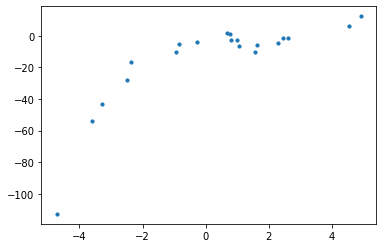

In [3]:
plt.scatter(x,y, s=10) #Vẽ scatter plot; s: size of point
plt.show()

In [4]:
x.shape #x là 1 vector 20 phần tử

(20,)

In [5]:
y.shape #y là 1 vector 20 phần tử

(20,)

### 1) Sử dụng model LinearRegression của sklearn

**Đầu vào LinearRegression là mảng 2 chiều, do đó ta phải biến đổi x, y** 

In [6]:
#thay đổi dữ liệu thành 2 chiều:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [7]:
x.shape

(20, 1)

In [8]:
y.shape

(20, 1)

In [9]:
#tạo model LinearRegression với thông số mặc định
model = LinearRegression()


In [10]:
#fit với bộ dữ liệu x, y
model.fit(x, y)
model

LinearRegression()

In [11]:
#Hệ số của model: y = ax1 + bx2 + c => model.coef_ = [a,b]
model.coef_

array([[8.54571389]])

In [12]:
#Hệ số của model: y = ax1 + bx2 + c => model.intercept_ = [c]
model.intercept_

array([-16.87042101])

#### ==> Phương trình đường thẳng tìm được: y = ax + b = 8.54x -16.87

#### Vẽ đường thẳng vừa tìm được

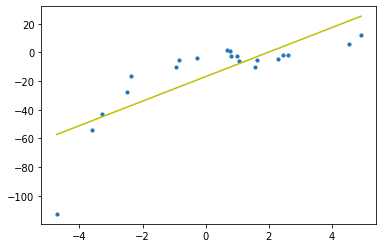

In [13]:
plt.scatter(x, y, s=10) #Vẽ các điểm ban đầu
plt.plot(x, model.coef_*x + model.intercept_, color='y') #Vẽ đường thẳng
plt.show()

#### Prediction:

In [14]:
y_pred = model.predict(x)
y_pred

array([[-57.22908967],
       [-47.65784202],
       [-45.00425315],
       [-38.08291011],
       [-37.06240916],
       [-24.87103759],
       [-24.13654459],
       [-19.28982521],
       [-11.15837781],
       [-10.30556519],
       [-10.03788027],
       [ -8.33344923],
       [ -7.80515424],
       [ -3.47185866],
       [ -2.89839286],
       [  2.86724311],
       [  4.10137297],
       [  5.48067826],
       [ 22.11758026],
       [ 25.27561825]])

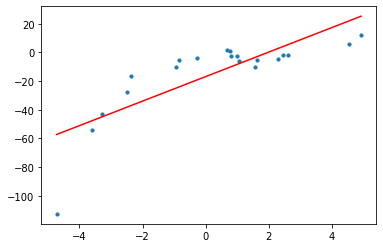

In [15]:
#Vẽ đường thẳng tìm được bằng cách vẽ các điểm, ta thấy 2 các vẽ đều cho ra cùng một đường thẳng
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

#### Tính RMSE: (Root Mean Squared Errors)

In [16]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse

16.491675261330542

**==> Nhận xét: đường thẳng này fit các điểm dữ liệu chưa thật tốt. Do đó chúng ta sẽ thử sử dụng PolynomialRegression** để fit các điểm dữ liệu tốt hơn

### 2) Sử dụng PolynomialRegression 

In [17]:
from sklearn.preprocessing import PolynomialFeatures

#### Use ``PolynomialFeatures`` to genere polynomial and interaction features.

In [18]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        , -3.29215704, 10.83829796],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  4.56228722, 20.81446466],
       [ 1.        ,  4.93183364, 24.32298305]])

In [19]:
x_poly.shape

(20, 3)

In [20]:
x_poly[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [21]:
x_poly[:,1] #đây chính là x

array([-4.7226796 , -3.60267397, -3.29215704, -2.48223722, -2.36282052,
       -0.93621395, -0.85026525, -0.28311318,  0.6684103 ,  0.76820449,
        0.79952837,  0.99897702,  1.0607969 ,  1.56786929,  1.63497495,
        2.30965656,  2.45407162,  2.61547479,  4.56228722,  4.93183364])

In [22]:
x_poly[:,2] # đây là x**2

array([22.30370258, 12.97925974, 10.83829796,  6.16150161,  5.58292081,
        0.87649656,  0.722951  ,  0.08015307,  0.44677233,  0.59013814,
        0.63924562,  0.99795508,  1.12529005,  2.4582141 ,  2.67314309,
        5.3345134 ,  6.02246754,  6.84070838, 20.81446466, 24.32298305])

#### ==> Do đó:  (20,3) : 3 columns, tương ứng 1, x, x**2

#### Sử dụng LinearRegression() trên ``x_poly``

In [23]:
x_poly.shape

(20, 3)

In [24]:
model = LinearRegression()
model.fit(x_poly, y)
model

LinearRegression()

In [25]:
model.coef_ #bộ hệ số cho (1, x, x**2)

array([[ 0.        ,  8.73901887, -1.63500804]])

In [26]:
model.intercept_

array([-6.15124845])

#### Predictions:

In [27]:
y_poly_pred = model.predict(x_poly)
y_poly_pred

array([[-83.88956767],
       [-58.85627832],
       [-52.64217526],
       [-37.91767104],
       [-35.928102  ],
       [-15.76591877],
       [-14.76376323],
       [ -8.75643075],
       [ -1.04047457],
       [ -0.4027755 ],
       [ -0.20932663],
       [  0.94716597],
       [  1.27921734],
       [  3.531191  ],
       [  3.76621803],
       [  5.31091144],
       [  5.44814691],
       [  5.52082186],
       [ -0.31315153],
       [ -2.82013417]])

In [28]:
y_poly_pred.shape

(20, 1)

#### Tính RMSE: (Root Mean Squared Errors)

In [29]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
rmse

10.960190607855624

#### Vẽ fitted curve

**Cách 1**: Sử dụng predicted values



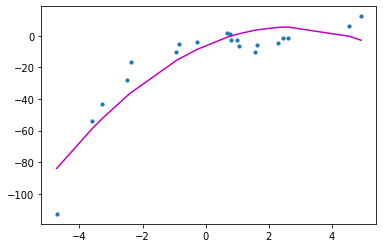

In [30]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')


**Cách 2**: Sử dụng coefficients



In [31]:
model.coef_.shape

(1, 3)

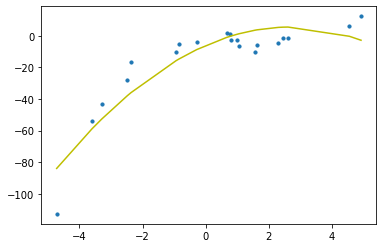

In [32]:
plt.scatter(x, y, s=10) #Vẽ các điểm ban đầu
plt.plot(x, model.coef_[0][0] + model.coef_[0][1] *x + model.coef_[0][2] *x*x + model.intercept_, color='y') #Vẽ đường thẳng
plt.show()

### 3) Thử với nhiều bậc degree khác nhau

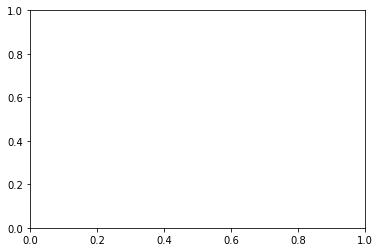

In [33]:
fig, axes = plt.subplots(1)

In [34]:
axes.scatter(x, y, s=10)

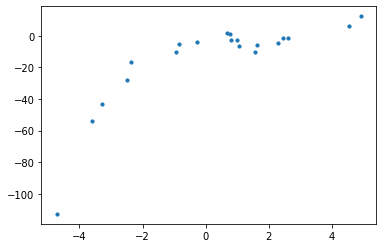

In [35]:
fig

In [36]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, X_train, Y_train, axes ):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))

  
  print("The model performance for the training set at degree ", degree, "is: ")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))

  axes.plot(X_train,y_train_predicted, label = str(degree)) 
 
  print("\n")
  

In [39]:
#for degree in range(2,5):
create_polynomial_regression_model(25, x, y, axes)

The model performance for the training set at degree  25 is: 
-------------------------------------------
RMSE of training set is 2.5415398283969415




**Nhận xét: Khi degree càng cao thì RMSE càng giảm: model càng fit tốt với dữ liệu**

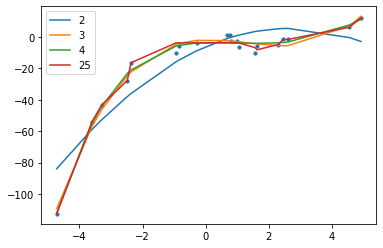

In [40]:
axes.legend()
fig

--End